In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [2]:
d = {'file':['[PPDB] 패널 기초 조사 설문지.docx', '[PPDB] 패널 기초 조사 코드북.xlsx', '[PPDB] data.csv',\
             '[PAYMENT] 데이터 정제_테이블명세서.xlsx','[PAYMENT] 브랜드코드_추출.xlsx','[PAYMENT] PAYMENT_201811.csv',\
             '[PAYMENT] Summary_Brand.csv','[PAYMENT] Summary_Category.csv','[PAYMENT] Summary_Total.csv',\
             '[APP] 데이터정제_테이블명세서.xlsx','[APP] usage_category_MME.xlsx','[APP] Refine_Usage_Sum_Time(60~63).csv',\
             '[APP] Refine_CategoryTime_G.csv','[APP] Refine_CategoryTime_MME.csv','[APP] Refine_AppTime.csv'],\
     'name':['a1','a2','a3','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6'] }
info = pd.DataFrame(data=d)
info

,file,name
0,[PPDB] 패널 기초 조사 설문지.docx,a1
1,[PPDB] 패널 기초 조사 코드북.xlsx,a2
2,[PPDB] data.csv,a3
3,[PAYMENT] 데이터 정제_테이블명세서.xlsx,b1
4,[PAYMENT] 브랜드코드_추출.xlsx,b2
5,[PAYMENT] PAYMENT_201811.csv,b3
6,[PAYMENT] Summary_Brand.csv,b4
7,[PAYMENT] Summary_Category.csv,b5
8,[PAYMENT] Summary_Total.csv,b6
9,[APP] 데이터정제_테이블명세서.xlsx,c1


In [55]:
a2 = pd.ExcelFile('[PPDB] 패널 기초 조사 코드북.xlsx')
# a2_1, a2_2, ... , a2_16에 각각의 sheet를 할당합니다!
for i in np.arange(1, len(a2.sheet_names)+1,1):
    globals()['a2_{}'.format(i)] = pd.read_excel(a2, a2.sheet_names[i-1], encoding = 'euc-kr')
a3 = pd.read_csv('[PPDB] data.csv', low_memory = False) # 115854명의 데이터

b1 = pd.ExcelFile('[PAYMENT] 데이터 정제_테이블명세서.xlsx')
for i in np.arange(1, len(b1.sheet_names)+1,1):
    globals()['b1_{}'.format(i)] = pd.read_excel(b1, b1.sheet_names[i-1], encoding = 'euc-kr')
b2 = pd.read_csv('Brandcode.csv') # 브랜드코드 파일이 깨져서 다시 만들었습니다.
b3_201811 = pd.read_csv('[PAYMENT] PAYMENT_201811.csv ', low_memory = False)
b3_201812 = pd.read_csv('[PAYMENT] PAYMENT_201812.csv ', low_memory = False)
b3_201901 = pd.read_csv('[PAYMENT] PAYMENT_201901.csv ', low_memory = False)
b3_201902 = pd.read_csv('[PAYMENT] PAYMENT_201902.csv ', low_memory = False)
b4= pd.read_csv('[PAYMENT] Summary_Brand.csv', low_memory = False)
b5= pd.read_csv('[PAYMENT] Summary_Category.csv', low_memory = False)
b6 = pd.read_csv('[PAYMENT] Summary_Total.csv ', low_memory = False)  # 33083의 데이터'

In [4]:
'''
apptime1 = pd.read_csv('[APP] Refine_Usage_Sum_Time(60~63).csv', low_memory = False)
apptime2 = pd.read_csv('[APP] Refine_Usage_Sum_Time(64~67).csv', low_memory = False)
apptime3 = pd.read_csv('[APP] Refine_Usage_Sum_Time(68~72).csv', low_memory = False)
apptime4 = pd.read_csv('[APP] Refine_Usage_Sum_Time(73~76).csv', low_memory = False)
frames = [apptime1, apptime2, apptime3, apptime4]

c3 = pd.concat(frames)'''

"\napptime1 = pd.read_csv('[APP] Refine_Usage_Sum_Time(60~63).csv', low_memory = False)\napptime2 = pd.read_csv('[APP] Refine_Usage_Sum_Time(64~67).csv', low_memory = False)\napptime3 = pd.read_csv('[APP] Refine_Usage_Sum_Time(68~72).csv', low_memory = False)\napptime4 = pd.read_csv('[APP] Refine_Usage_Sum_Time(73~76).csv', low_memory = False)\nframes = [apptime1, apptime2, apptime3, apptime4]\n\nc3 = pd.concat(frames)"

In [56]:
frames = [b3_201811, b3_201812, b3_201901, b3_201902]

payment = pd.concat(frames)

In [62]:
brandcode = [203, 204, 205, 206, 207, 208, 209, 211, 214, 216, 217, 218, 219, 221, 223, 228, 501, 520, 558, 630]
beauty_payment = payment[payment.CATEGORY_GROUP_CODE.isin(brandcode)]

In [67]:
beauty_payment_additional = payment[payment.APPROVAL_STORE.str.contains('미미박스')
                        | payment.APPROVAL_STORE.str.contains('더샘')
                        | payment.APPROVAL_STORE.str.contains('클리오')
                        | payment.APPROVAL_STORE.str.contains('네이처컬렉션')
                        | payment.APPROVAL_STORE.str.contains('록시땅코리아')
                        | payment.APPROVAL_STORE.str.contains('오휘')
                        | payment.APPROVAL_STORE.str.contains('어퓨')
                        | payment.APPROVAL_STORE.str.contains('에스쁘아')
                        | payment.APPROVAL_STORE.str.contains('홀리카')]

In [68]:
# 일단 카테고리를 크게 로드샵과 뷰티앤헬스스토어로 나눠볼까요

bh_code = [203, 204, 209, 216]
road_code = [e for e in brandcode if e not in bh_code]

In [69]:
#len(beauty_payment_additional) # 757개면 무시할 수 없어요...ㅎ 전체 데이터에는 넣읍시다.

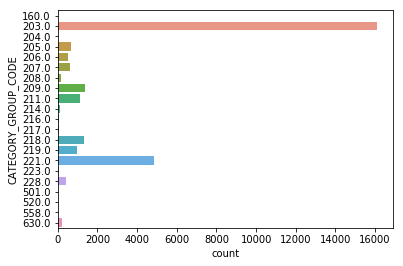

In [70]:
frame = [beauty_payment, beauty_payment_additional]
beauty_payment = pd.concat(frame)
beauty_panel = beauty_payment.PANEL_ID.unique()
sns.countplot(y='CATEGORY_GROUP_CODE', data=beauty_payment)

In [71]:
bh_code = [203, 204, 209, 216]
road_code = [e for e in brandcode if e not in bh_code]

# bh 패널
bh_payment = payment[payment.CATEGORY_GROUP_CODE.isin(bh_code)]
bh_panel = bh_payment.PANEL_ID.unique()

# road 패널
road_payment = payment[payment.CATEGORY_GROUP_CODE.isin(road_code)]
road_panel = road_payment.PANEL_ID.unique()

# bh&road 패널
both_panel = list(set(road_panel) & set(bh_panel))

# bh ONLY 패널
bhonly_panel = set(bh_panel)-set(both_panel)

# road ONLY 패널
roadonly_panel = set(road_panel)-set(both_panel)

print(len(bh_panel), len(road_panel), len(both_panel))

7642 5506 2584


In [72]:
bh_survey = a3[a3.id.isin(bhonly_panel)]

road_survey = a3[a3.id.isin(roadonly_panel)]

In [73]:
bhonly_man = set(bh_survey['id']) - set(a3.loc[a3['X0001'] == 2]['id'])
bhonly_woman = set(bh_survey['id']) - set(bhonly_man)
roadonly_man = set(road_survey['id']) - set(a3.loc[a3['X0001'] == 2]['id'])
roadonly_woman = set(road_survey['id']) - set(roadonly_man)

for i in [1,3,4,5,6]:
    bhonly_woman_20s = bhonly_woman - set(a3.loc[a3['X0002']==i]['id'])
    bhonly_woman = bhonly_woman_20s
    roadonly_woman_20s = roadonly_woman - set(a3.loc[a3['X0002']==i]['id'])
    roadonly_woman = roadonly_woman_20s

roadonly_woman_20s = roadonly_woman
bhonly_woman_20s = bhonly_woman
 
###########################################

bhonly_man = set(bh_survey['id']) - set(a3.loc[a3['X0001'] == 2]['id'])
bhonly_woman = set(bh_survey['id']) - set(bhonly_man)
roadonly_man = set(road_survey['id']) - set(a3.loc[a3['X0001'] == 2]['id'])
roadonly_woman = set(road_survey['id']) - set(roadonly_man)

for i in [1,2,4,5,6]:
    bhonly_woman_30s = bhonly_woman - set(a3.loc[a3['X0002']==i]['id'])
    bhonly_woman = bhonly_woman_30s
    roadonly_woman_30s = roadonly_woman - set(a3.loc[a3['X0002']==i]['id'])
    roadonly_woman = roadonly_woman_30s
    
roadonly_woman_30s = roadonly_woman
bhonly_woman_30s = bhonly_woman


#print('bh남',len(bhonly_man), ',', 'bh여',len(bhonly_woman), 'vs' 'road남', len(roadonly_man), ',', 'road여',len(roadonly_woman) )

In [74]:
print('bh20', len(bhonly_woman_20s))
print('bh30',len(bhonly_woman_30s))
print('road20',len(roadonly_woman_20s))
print('road30',len(roadonly_woman_30s))

bh20 677
bh30 786
road20 303
road30 501


In [75]:
#################################

In [14]:
bhonly_woman_20s = a3.loc[a3['id'].isin(bhonly_woman_20s)]
bhonly_woman_30s = a3.loc[a3['id'].isin(bhonly_woman_30s)]
roadonly_woman_20s = a3.loc[a3['id'].isin(roadonly_woman_20s)]
roadonly_woman_30s = a3.loc[a3['id'].isin(roadonly_woman_30s)]

In [15]:
a = pd.concat([bhonly_woman_20s,bhonly_woman_30s,bhonly_woman_20s,bhonly_woman_30s])

In [16]:
a = pd.DataFrame(bhonly_woman_20s.mean())
b = pd.DataFrame(bhonly_woman_30s.mean())
c = pd.DataFrame(roadonly_woman_20s.mean())
d = pd.DataFrame(roadonly_woman_30s.mean())
x = pd.concat([a,b,c,d],axis=1)
x.columns = ['bhw2','bhw3','rdw2','rdw3']
x['bh 비교']=x['bhw2']/x['bhw3']
x['rd 비교']=x['rdw2']/x['rdw3']
x['20대 비교']=x['bhw2']/x['rdw2']
x['30대 비교']=x['bhw3']/x['rdw3']

### Intro. [여성] 20대 vs 30대

In [18]:
# 여자 20대 30대 비교
woman20 = pd.DataFrame(a3.loc[a3['X0002']==2].loc[a3['X0001']==2].mean())
woman30 = pd.DataFrame(a3.loc[a3['X0002']==3].loc[a3['X0001']==2].mean())
y = pd.concat([woman20, woman30],axis=1)
y.columns = ['woman20','woman30']
y['proportion'] = y['woman20']/y['woman30']
y.head()

,woman20,woman30,proportion
X0001,2.000000,2.000000,1.000000
X0002,2.000000,3.000000,0.666667
X0003,3.580187,5.439174,0.658222
X0004,2.580187,3.439174,0.750234
X0005,5.535412,5.600969,0.988295


In [36]:
y.loc[y.index=='K0021']

,woman20,woman30,proportion
K0021,0.200185,0.107035,1.87027


### Intro. [여성] BeautyHealth vs Roadshop

In [37]:
bh = pd.DataFrame(a3.loc[a3['X0002']==2].loc[a3.id.isin(bhonly_panel)].mean())
rd = pd.DataFrame(a3.loc[a3['X0002']==3].loc[a3.id.isin(roadonly_panel)].mean())
z = pd.concat([bh,rd],axis=1)
z.columns = ['bh','rd']
z['proportion'] = z['bh']/z['rd']
z.head()

,bh,rd,proportion
X0001,1.683148,1.737850,0.968523
X0002,2.000000,3.000000,0.666667
X0003,3.580222,5.521355,0.648432
X0004,2.580222,3.521355,0.732736
X0005,5.701312,5.876289,0.970223


In [38]:
compare_bh2030 = x[['bhw2','bhw3','bh 비교']]
compare_rd2030 = x[['rdw2','rdw3','rd 비교']]
compare_bhrd20 = x[['bhw2','rdw2','20대 비교']]
compare_bhrd30 = x[['bhw3','rdw3','30대 비교']]

### 1. [Road샵] 20대 vs 30대 -> 유형별 질문

In [127]:
compare_rd2030 = pd.concat([compare_rd2030,y],axis=1)

In [231]:
compare_rd2030.loc[compare_rd2030.index.str.contains('F')]

,rdw2,rdw3,rd 비교,woman20,woman30,proportion
F0001,0.049505,0.043912,1.127363,0.051005,0.048327,1.055415
F0002,0.234323,0.161677,1.449334,0.196385,0.157642,1.245768
F0003,0.402640,0.379242,1.061699,0.385171,0.385311,0.999638
F0004,0.046205,0.039920,1.157426,0.051244,0.046454,1.103122
F0005,0.333333,0.285429,1.167832,0.330401,0.284993,1.159329
F0006,0.016502,0.025948,0.635948,0.013966,0.022067,0.632919
F0007,0.221122,0.175649,1.258888,0.219457,0.171688,1.278232
F0008,0.115512,0.145709,0.792757,0.136241,0.135697,1.004004
F0009,0.260726,0.221557,1.176791,0.232978,0.220992,1.054240
F0010,0.006601,0.017964,0.367437,0.009448,0.012988,0.727455


### 2. [Beauty샵] 20대 vs 30대 -> 유형별 질문

In [160]:
compare_bh2030 = pd.concat([compare_bh2030,y],axis=1)

In [188]:
compare_bh2030.loc[compare_bh2030.index.str.contains('M')]

,bhw2,bhw3,bh 비교,woman20,woman30,proportion
M0001,0.732644,0.854962,0.856932,0.723753,0.860720,0.840870
M0002,0.075332,0.091603,0.822378,0.077123,0.114119,0.675812
M0003,0.329394,0.251908,1.307596,0.341594,0.286825,1.190950
M0004,0.646972,0.601781,1.075095,0.635368,0.564490,1.125561
M0005,0.571640,0.382952,1.492720,0.512477,0.365565,1.401879
M0006,0.435746,0.382952,1.137861,0.186458,0.216310,0.861996
M0007,0.104874,0.072519,1.446163,0.085373,0.063961,1.334774
M0008,0.382570,0.352417,1.085560,0.373669,0.322775,1.157677
M0009,0.771049,0.680662,1.132793,0.750214,0.695424,1.078787
M0010,0.590842,0.805344,0.733652,0.573101,0.788494,0.726830


### 3. [20대] Road vs Beuaty

In [39]:
compare_bhrd20 = pd.concat([compare_bhrd20,z],axis=1)

In [56]:
k = compare_bhrd20.loc[compare_bhrd20.index.str.contains('F')]
k = k.loc[(k['20대 비교']>1.2) | (k['20대 비교']<0.8)]
k.loc[k['bhw2']+k['rdw2']>0.15]

,bhw2,rdw2,20대 비교,bh,rd,proportion
F0014,0.140325,0.115512,1.214813,0.128153,0.117820,1.087702
F0017,0.172821,0.138614,1.246782,0.119072,0.058910,2.021241
F0026,0.280650,0.224422,1.250543,0.269425,0.098675,2.730440
F0033,0.515510,0.415842,1.239678,0.422805,0.430044,0.983167
F0044,0.243722,0.181518,1.342688,0.204844,0.173785,1.178719


### 4. [30대] Road vs Beuaty

In [212]:
compare_bhrd30 = pd.concat([compare_bhrd30,z],axis=1)

In [65]:
k = compare_bhrd30.loc[compare_bhrd30.index.str.contains('K')]
k = k.loc[(k['30대 비교']>1.2) | (k['30대 비교']<0.8)]
k.loc[k['bhw3']+k['rdw3']>0.15]

,bhw3,rdw3,30대 비교
K0001,0.155216,0.123752,1.254248
K0003,0.103053,0.067864,1.518523
K0004,0.099237,0.071856,1.381043
K0012,0.143766,0.119760,1.200445
K0019,0.176845,0.145709,1.213688
K0020,0.181934,0.149701,1.215318
K0021,0.114504,0.085828,1.334103
K0041,0.151399,0.125749,1.203986
K0042,0.114504,0.089820,1.274809
K0065,0.173028,0.139721,1.238386


In [22]:
bhonly_man_a3 = a3.loc[a3['id'].isin(bhonly_man)]
bhonly_woman_a3 = a3.loc[a3['id'].isin(bhonly_woman)]
roadonly_man_a3 = a3.loc[a3['id'].isin(roadonly_man)]
roadonly_woman_a3 = a3.loc[a3['id'].isin(roadonly_woman)]

In [50]:
a= pd.DataFrame(bhonly_man_a3.mean())
b= pd.DataFrame(roadonly_man_a3.mean())
c= pd.DataFrame(bhonly_woman_a3.mean())
d= pd.DataFrame(roadonly_woman_a3.mean())

mancompare = pd.concat([a,b],axis=1)
womancompare = pd.concat([c,d],axis=1)

In [51]:
mancompare.columns = ['bh','road']
womancompare.columns = ['bh','road']

mancompare['proportion']=mancompare['bh']/mancompare['road']
womancompare['proportion']=womancompare['bh']/womancompare['road']

In [58]:
mancompare.head()

,bh,road,proportion
X0001,1.000000,1.000000,1.000000
X0002,2.855596,3.215130,0.888174
X0003,5.221420,5.952719,0.877149
X0004,3.332130,3.695035,0.901786
X0005,5.249097,5.420804,0.968325


In [83]:
compareman = mancompare.loc[(mancompare['proportion']>=1.5) | (mancompare['proportion']<0.6)]
comparewoman = womancompare.loc[(womancompare['proportion']>=1.3) | (womancompare['proportion']<0.8)]
comparewoman

,bh,road,proportion
Y0002,0.064582,0.109881,0.587749
Y0003,0.131727,0.172913,0.761812
Y0009,37.885700,25.529813,1.483979
Y0010,37.821630,25.269165,1.496750
A0068,0.023065,0.017036,1.353921
A0070,0.015889,0.027257,0.582938
A0073,0.012814,0.009370,1.367597
A0074,0.075346,0.103918,0.725051
B0002,0.006663,0.011925,0.558761
B0023,0.080984,0.060477,1.339089


In [12]:
print(len(roadonly_panel), 'vs', len(bhonly_panel))

2922 vs 5058


In [13]:
df_roadonly = a3.loc[a3['id'].isin(roadonly_panel)]
df_bhonly = a3.loc[a3['id'].isin(bhonly_panel)]

In [14]:
a = pd.DataFrame(df_roadonly.mean())
b = pd.DataFrame(df_bhonly.mean())
df = pd.concat([a,b],axis=1)
df.columns = ['road','bh']
df['proportion']=df['road']/df['bh']
df.head()

,road,bh,proportion
X0001,1.735128,1.701294,1.019887
X0002,3.055103,2.851546,1.071385
X0003,5.637445,5.198418,1.084454
X0004,3.539136,3.318116,1.066610
X0005,5.950532,5.626528,1.057585


In [15]:
df.loc[(df['proportion']>=1.3) | (df['proportion']<=0.7)]

,road,bh,proportion
Y0002,0.113338,0.066499,1.704351
Y0003,0.167188,0.125090,1.336547
Y0005,0.095805,0.073688,1.300139
Y0009,24.432686,41.652049,0.586590
Y0010,24.594865,40.933501,0.600849
A0070,0.029430,0.018692,1.574515
B0002,0.010645,0.007549,1.410204
B0034,0.005636,0.008986,0.627126
F0004,0.038197,0.057153,0.668321
F0006,0.032561,0.021567,1.509747


In [77]:
print('bh20', len(bhonly_woman_20s))
print('bh30',len(bhonly_woman_30s))
print('road20',len(roadonly_woman_20s))
print('road30',len(roadonly_woman_30s))

bh20 677
bh30 786
road20 303
road30 501


In [79]:
bhonly_woman_20s = a3.loc[a3['id'].isin(bhonly_woman_20s)]
bhonly_woman_30s = a3.loc[a3['id'].isin(bhonly_woman_30s)]
roadonly_woman_20s = a3.loc[a3['id'].isin(roadonly_woman_20s)]
roadonly_woman_30s = a3.loc[a3['id'].isin(roadonly_woman_30s)]

In [80]:
기혼 = bhonly_woman_30s.loc[bhonly_woman_30s['X0007']==1]
미혼 = bhonly_woman_30s.loc[a3['X0007']==2]

In [82]:
len(미혼)

484

In [40]:
기혼30돈 = 기혼30.loc[a3['Y0008']==3]
미혼30돈 = 미혼30.loc[a3['Y0008']==3]

In [41]:
df기 = pd.DataFrame(기혼30돈.mean())
df미 = pd.DataFrame(미혼30돈.mean())

In [42]:
df기미 = pd.concat([df기,df미],axis=1)

In [43]:
df기미.columns = ['기혼','미혼']
df기미['비율'] = df기미['기혼']/df기미['미혼']

In [44]:
df기미유의미 = df기미.loc[(df기미['비율']>1.2)|(df기미['비율']<0.8)].loc[df기미['기혼']+df기미['미혼']>0.2]

In [45]:
df기미유의미.head(3)

,기혼,미혼,비율
X0005,4.998285,6.491058,0.770026
X0007,1.000000,2.000000,0.500000
Y0001,2.515914,3.246848,0.774879


In [46]:
df기미유의미.loc[df기미유의미.index.str.contains('')]

,기혼,미혼,비율
A0001,0.482196,0.371538,1.297836
A0006,0.143620,0.259551,0.553340
A0009,0.142433,0.212452,0.670426
A0022,0.279822,0.224176,1.248223
A0028,0.468546,0.672125,0.697112
A0029,0.493472,0.672125,0.734197
A0031,0.425519,0.672125,0.633096
A0032,0.389614,0.583384,0.667852
A0036,0.362018,0.288862,1.253255
A0046,0.288724,0.363048,0.795277
